# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show upfor their appointment. A number of characteristics about the patient are included in each row.


### Questions : 

### 1 – Did most of the patients miss the appointment or not?


### 2 – What is the percentage of the patients that have Hypertension,Diabetes, Alcoholism or Handicap?


### 3 – Is the SMS messages help the patients to remember the appointment?


### 4 – Is the scholarship has effect on their appointment or not?


### 5 – Is there a relationship between Gender and missing their appointment? 


### 6 – Is there any correlation between the “show” column (The dependent variable) and the other columns (“The independent columns”)? 

### 7 – If there is correlation between the dependent column and independent column, Is it strong correlation or weak correlation?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling

# Gathering data

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

## Assessing Data visually and programmitaclly

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64

In [11]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [12]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [13]:
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

## Cleaning data

#### 1 - converting the type of patientid column to integer
#### 2 - removing PatientId column because all rows have the same value after converting to integer so it is useless 
#### 3 - removing the rows whose age is less than 1
#### 4 - the handcap col should be 0 or 1 only
#### 5 - removing "T00:00:00Z" from AppointmentDay column
#### 6 -  removing characters from ScheduledDay column
#### 7 - ScheduledDay and AppointmentDay columns should be datetime instead of string
#### 8 - making date and time of ScheduledDay column in seperate columns
#### 9 - dropping ScheduledDay column
#### 10 -  The name of Hypertension and Handcap column should be Hipertension and Handicap

#### Define : converting the type of patientid column to integer

In [15]:
#code
df.PatientId = df.PatientId.astype(int)
#test
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Define : removing PatientId column because all rows have the same value so it is useless 

In [16]:
# code
df.drop("PatientId",axis = 1,inplace = True)
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.0+ MB


#### Define : removing age whose age is less than 1

In [17]:
# code
df = df[df['Age']>0]
# test
df.Age.value_counts()

1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

#### Define : the handcap columns should be 0 or 1 only

In [18]:
# code
df = df[(df["Handcap"]==0) | (df["Handcap"] == 1)]
#test
df["Handcap"].value_counts()

0    104747
1      2041
Name: Handcap, dtype: int64

#### Define : Removing T00:00:00Z from AppointmentDay column

In [19]:
#code
df.AppointmentDay = df.AppointmentDay.str.strip('T00:00:00Z')
#test
df.AppointmentDay.head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

In [20]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Define : removing characters from ScheduledDay column

In [21]:
#code
df.ScheduledDay = df.ScheduledDay.str.strip('T')
df.ScheduledDay = df.ScheduledDay.str.strip('Z')
#test
df.ScheduledDay.head()

0    2016-04-29T18:38:08
1    2016-04-29T16:08:27
2    2016-04-29T16:19:04
3    2016-04-29T17:29:31
4    2016-04-29T16:07:23
Name: ScheduledDay, dtype: object

#### Define : ScheduledDay and AppointmentDay columns should be datetime instead of string

In [22]:


#code
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x : pd.to_datetime(str(x)))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x : pd.to_datetime(str(x)))


# test
df.ScheduledDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

#### Define : making date and time in seperate columns

In [23]:
#code
df['ScheduledDay(date)'] = df['ScheduledDay'].dt.date
df['ScheduledDay(time)'] =df['ScheduledDay'].dt.time
#test
df["ScheduledDay(time)"].head()

0    18:38:08
1    16:08:27
2    16:19:04
3    17:29:31
4    16:07:23
Name: ScheduledDay(time), dtype: object

In [24]:
#test
df["ScheduledDay(date)"].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: ScheduledDay(date), dtype: object

#### Define : dropping ScheduledDay column

In [25]:
#code
df.drop("ScheduledDay",axis = 1,inplace = True)


#test
df.columns

Index(['AppointmentID', 'Gender', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'ScheduledDay(date)', 'ScheduledDay(time)'],
      dtype='object')

## Define : The name of Hypertension and Handcap column should be Hipertension and Handicap

In [26]:
#code
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)


#test
df.columns

Index(['AppointmentID', 'Gender', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'ScheduledDay(date)', 'ScheduledDay(time)'],
      dtype='object')

In [27]:
df.rename(columns={'No-show':'show'}, inplace=True)


df['show'].replace("Yes" , 0 , inplace = True)
df['show'].replace("No" , 1 , inplace = True)

<a id='eda'></a>
# Exploratory Data Analysis

Text(0.5, 1.0, 'Histogram of Age')

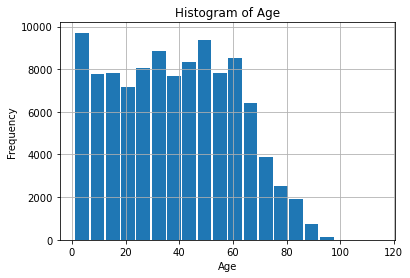

In [28]:
df['Age'].plot.hist(grid=True, bins=20, rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

### the histogram shows the number of patients from 1 to 60 years is almost equal then started to decrase  

<AxesSubplot:xlabel='Age'>

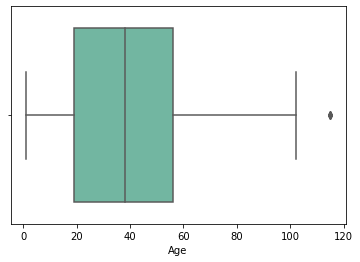

In [29]:
sns.boxplot(palette="Set2",x = df["Age"])

### the box plot shows that there is 1 row represent an outlier 

Text(0.5, 1.0, 'Diabetes patients')

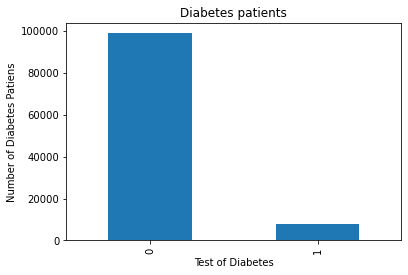

In [30]:
df["Diabetes"].value_counts().plot(kind = 'bar')
plt.xlabel("Test of Diabetes")
plt.ylabel("Number of Diabetes Patiens")
plt.title("Diabetes patients")

### Most of the patients doesnot have diabetes

Text(0.5, 1.0, 'Hypertension patients')

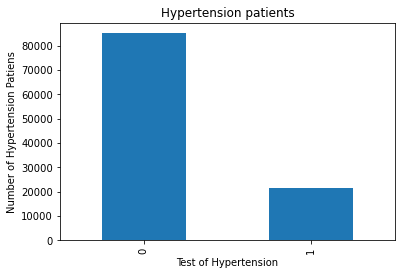

In [31]:
df["Hypertension"].value_counts().plot(kind = 'bar')
plt.xlabel("Test of Hypertension")
plt.ylabel("Number of Hypertension Patiens")
plt.title("Hypertension patients")

### Most of the patients doesnot have Hypertension

Text(0.5, 1.0, 'Alcoholism patients')

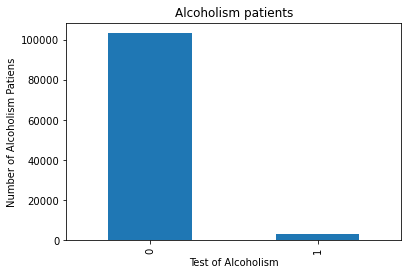

In [32]:
df["Alcoholism"].value_counts().plot(kind = 'bar')
plt.xlabel("Test of Alcoholism")
plt.ylabel("Number of Alcoholism Patiens")
plt.title("Alcoholism patients")

### Most of the patients tests negative for Alcoholism

Text(0.5, 1.0, 'Scholarship')

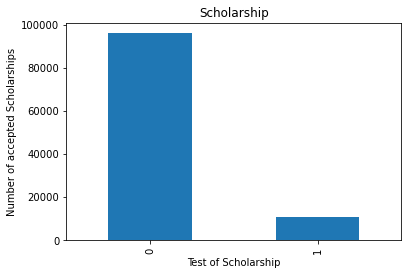

In [33]:
df["Scholarship"].value_counts().plot(kind = 'bar')
plt.xlabel("Test of Scholarship")
plt.ylabel("Number of accepted Scholarships")
plt.title("Scholarship")

### Most of the patients doesnot have any scholarships 

Text(0.5, 1.0, 'Receving SMS')

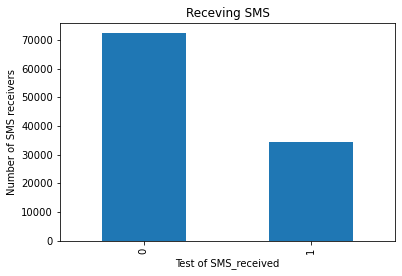

In [34]:
df["SMS_received"].value_counts().plot(kind = 'bar')
plt.xlabel("Test of SMS_received")
plt.ylabel("Number of SMS receivers")
plt.title("Receving SMS")

### About more than 70,000 patient didn't receive any SMS about the appointment

Text(0.5, 1.0, 'Scheduled Appointments')

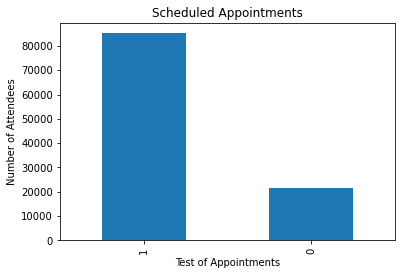

In [35]:
df["show"].value_counts().plot(kind = 'bar')
plt.xlabel("Test of Appointments")
plt.ylabel("Number of Attendees")
plt.title("Scheduled Appointments")

### About 30,000 patient missed their scheduled appointments

Text(0.5, 1.0, 'Gender of patients')

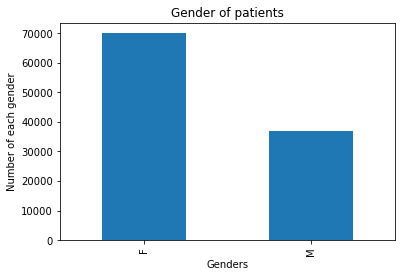

In [36]:
df["Gender"].value_counts().plot(kind = 'bar')
plt.xlabel("Genders")
plt.ylabel("Number of each gender")
plt.title("Gender of patients")

### Number of female patiens is more than male patients

In [37]:
df.corr()

,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show
AppointmentID,1.000000,-0.023530,0.022513,0.012112,0.022652,0.033331,0.015062,-0.254940,0.161435
Age,-0.023530,1.000000,-0.112379,0.501163,0.289997,0.090254,0.078213,0.005368,0.067533
Scholarship,0.022513,-0.112379,1.000000,-0.024039,-0.027338,0.033727,-0.010494,-0.000006,-0.029632
Hypertension,0.012112,0.501163,-0.024039,1.000000,0.430005,0.085575,0.079515,-0.008779,0.037763
Diabetes,0.022652,0.289997,-0.027338,0.430005,1.000000,0.017036,0.053570,-0.016372,0.015916
Alcoholism,0.033331,0.090254,0.033727,0.085575,0.017036,1.000000,0.002328,-0.027338,0.000566
Handicap,0.015062,0.078213,-0.010494,0.079515,0.053570,0.002328,1.000000,-0.025017,0.008095
SMS_received,-0.254940,0.005368,-0.000006,-0.008779,-0.016372,-0.027338,-0.025017,1.000000,-0.127512
show,0.161435,0.067533,-0.029632,0.037763,0.015916,0.000566,0.008095,-0.127512,1.000000


<AxesSubplot:>

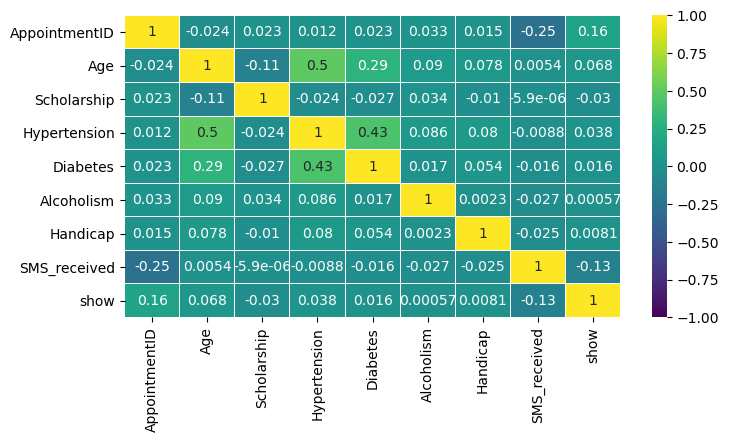

In [38]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "viridis", linewidths=0.01, annot=True)

## in this heatmap we find that correlation between show column and (scholarship-SMS-received) is very small and between the other columns we can depend on it in our model

In [39]:
gender_data=df.groupby('Gender')["show"].value_counts()
gender_data

Gender  show
F       1       55760
        0       14249
M       1       29389
        0        7390
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

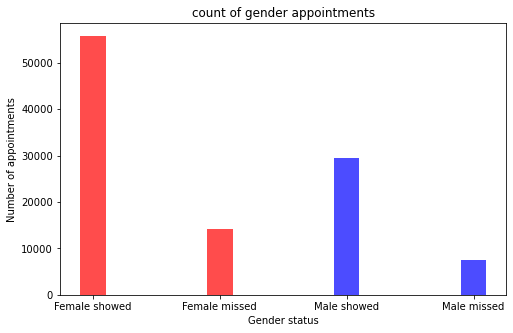

In [40]:
gender_data=df.groupby('Gender')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['Female showed','Female missed','Male showed','Male missed'],gender_data.values,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of gender appointments')
plt.xlabel('Gender status')
plt.ylabel('Number of appointments')

## The number of females is higher than males so females that didnot show up are more than male but on the other hand the number of female that show is more than male

In [41]:
SMS_received_data=df.groupby('SMS_received')["show"].value_counts()
SMS_received_data

SMS_received  show
0             1       60170
              0       12080
1             1       24979
              0        9559
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

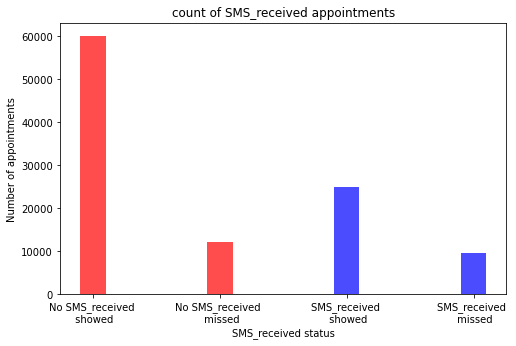

In [42]:
SMS_received_data=df.groupby('SMS_received')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['No SMS_received \n showed','No SMS_received \n missed','SMS_received \n showed','SMS_received \n missed'],SMS_received_data.values,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of SMS_received appointments')
plt.xlabel('SMS_received status')
plt.ylabel('Number of appointments')

## most of the people that receive or didnot receive SMS messages showed in the appointment

In [43]:
Scholarship_data=df.groupby('Scholarship')["show"].value_counts()
Scholarship_data

Scholarship  show
0            1       76928
             0       19069
1            1        8221
             0        2570
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

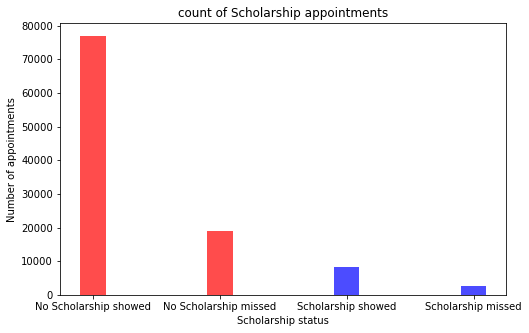

In [44]:
Scholarship_data=df.groupby('Scholarship')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['No Scholarship showed','No Scholarship missed','Scholarship showed','Scholarship missed'],Scholarship_data,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of Scholarship appointments')
plt.xlabel('Scholarship status')
plt.ylabel('Number of appointments')

## most of the patients with scholarship showed in the appointment and the patients with no scholarship whose showed or no is nearly equivalent

In [45]:
Alcoholism_data=df.groupby('Alcoholism')["show"].value_counts()
Alcoholism_data

Alcoholism  show
0           1       82472
            0       20964
1           1        2677
            0         675
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

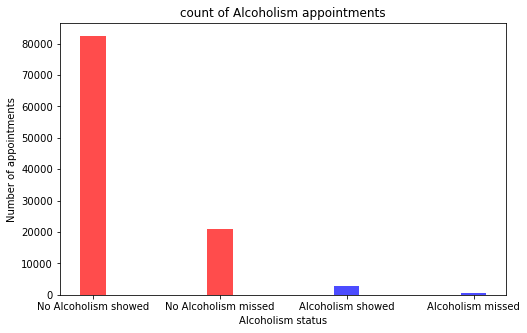

In [46]:
Alcoholism_data=df.groupby('Alcoholism')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['No Alcoholism showed','No Alcoholism missed','Alcoholism showed','Alcoholism missed'],Alcoholism_data.values,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of Alcoholism appointments')
plt.xlabel('Alcoholism status')
plt.ylabel('Number of appointments')

In [47]:
Hypertension_data=df.groupby('Hypertension')["show"].value_counts()
Hypertension_data

Hypertension  show
0             1       67181
              0       17891
1             1       17968
              0        3748
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

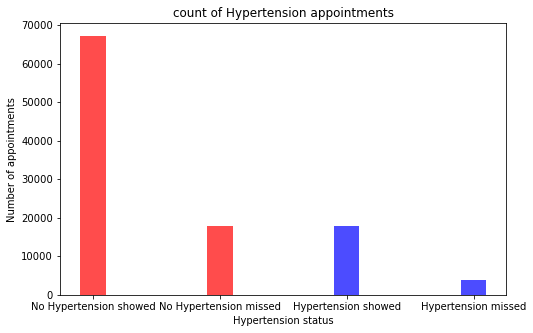

In [48]:
Hypertension_data=df.groupby('Hypertension')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['No Hypertension showed','No Hypertension missed','Hypertension showed','Hypertension missed'],Hypertension_data.values,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of Hypertension appointments')
plt.xlabel('Hypertension status')
plt.ylabel('Number of appointments')

In [49]:
Diabetes_data=df.groupby('Diabetes')["show"].value_counts()
Diabetes_data

Diabetes  show
0         1       78671
          0       20217
1         1        6478
          0        1422
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

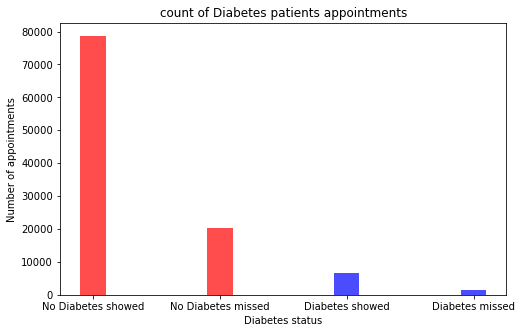

In [50]:
Diabetes_data=df.groupby('Diabetes')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['No Diabetes showed','No Diabetes missed','Diabetes showed','Diabetes missed'],Diabetes_data.values,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of Diabetes patients appointments')
plt.xlabel('Diabetes status')
plt.ylabel('Number of appointments')

In [51]:
Handicap_data=df.groupby('Handicap')["show"].value_counts()
Handicap_data

Handicap  show
0         1       83474
          0       21273
1         1        1675
          0         366
Name: show, dtype: int64

Text(0, 0.5, 'Number of appointments')

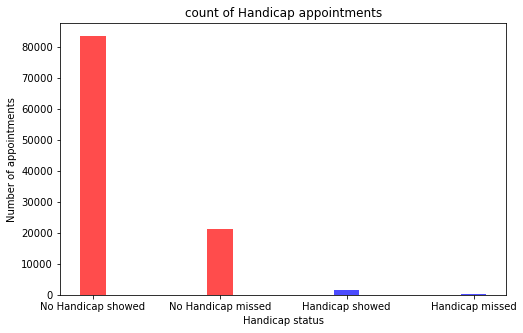

In [52]:
Handicap_data  =df.groupby('Handicap')["show"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['No Handicap showed','No Handicap missed','Handicap showed','Handicap missed'],Handicap_data.values,color=['red','red','blue','blue'],alpha=.7,width=.2)
plt.title('count of Handicap appointments')
plt.xlabel('Handicap status')
plt.ylabel('Number of appointments')

## from the last 4 bar plots  patients that are has Diabetes , Hypertension , Alcoholism or Handicap are less than who tested -ve but the attendence of +ve patients are higher than -ve patients

<a id='conclusions'></a>
# Conclusions

## Our data suggests that 
####  1 - Being enrolled in the Scholarship program does not seem to make people more likely to show up the appointment
#### 2 - SMS_received and Scholarship columns have weak correlation between them and Show column 
#### 3 - The distribution of Age between the patients is not big
#### 4 - Patients that have any disease like diabetes,alcoholism,handicap or hypertension most of them didn't miss the appointment
#### 5 - Handicap patients are more likely to show up in the appointment compared to people who are not handicap

# Limitations :

#### 1 - Some rows has the same date in the Appontmentday and ScheduledDay	I think it is entry problem
#### 2 - I used only Descriptive analysis and didnot use inferences or hypotheses to our data
#### 3 - The data showed that SMS_receivers didont have strong correlation with show column although It should be the patients who received messages are more likely to attend the appointment